## Hotel Booking Exploration

### by Sanan Yahyazade

In [1]:
# importing appropirate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
hotel = pd.read_csv('hotel_bookings.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel.shape

(119390, 32)

In [6]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Structure of dataset
There are 119390 bookings in the dataset with 32 features. Most variables are categoric in nature.



### Main features of interest in dataset

I'm most interested in figuring out which features are affects on potential tourists booking behavior.

### Features in the dataset will help support investigation 

I expect that, planned travel time, hotel type and price will affect tourists' booking behavior

## Multivariate exploration

### Cancelation rate over the month

#### What was the percentage of cancelation over the months for different hotel types?

Graph shows that, cancelation rate are much higher in city hotels than resort hotels. Different aspects could affect this result such as number of bookings and price per person. 

##### Finding hotel cancelation percentage 

In [9]:
# we will create a data frame which includes booking counts. cancelation counts and canelation percentage

hotel_booking = hotel.groupby(['hotel', 'arrival_date_month']).count()['is_canceled'].reset_index()

In [10]:
hotel_booking_canceled = hotel.groupby(['hotel', 'arrival_date_month']).sum()['is_canceled'].reset_index()

In [11]:
hotel_booking_canceled['booking'] = hotel_booking['is_canceled']

In [12]:
hotel_booking_canceled.head()

,hotel,arrival_date_month,is_canceled,booking
0,City Hotel,April,3465,7480
1,City Hotel,August,3602,8983
2,City Hotel,December,1740,4132
3,City Hotel,February,1901,4965
4,City Hotel,January,1482,3736


In [13]:
# adding column which includes canelation percentage
hotel_booking_canceled['cancelation_per'] = hotel_booking_canceled['is_canceled'] / hotel_booking_canceled['booking'] * 100

In [14]:
hotel_booking_canceled.head()

,hotel,arrival_date_month,is_canceled,booking,cancelation_per
0,City Hotel,April,3465,7480,46.323529
1,City Hotel,August,3602,8983,40.097963
2,City Hotel,December,1740,4132,42.110358
3,City Hotel,February,1901,4965,38.288016
4,City Hotel,January,1482,3736,39.668094


<Figure size 720x576 with 0 Axes>

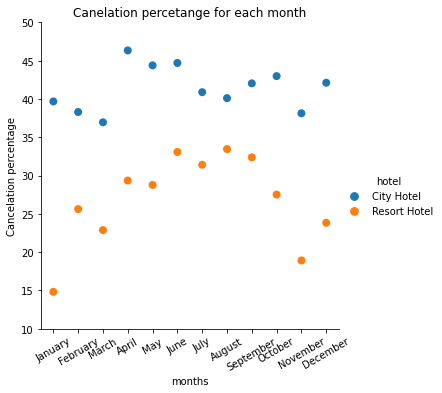

In [15]:
plt.figure(figsize=[10, 8])

months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']


sb.catplot(data= hotel_booking_canceled, x = 'arrival_date_month', y = 'cancelation_per', kind = 'swarm', s = 8,hue = 'hotel', order = months)
plt.xticks(rotation = 30)
plt.ylim(10, 50)
plt.ylabel('Cancelation percentage')
plt.xlabel('months')
plt.title('Canelation percetange for each month');

### Number of booking over the month

#### How number of bookings changes over the month for each hotel type ?

Here we can see that, number of bookings are higher in city hotels than resort hotels which might affect the cancelation rate.

<Figure size 720x576 with 0 Axes>

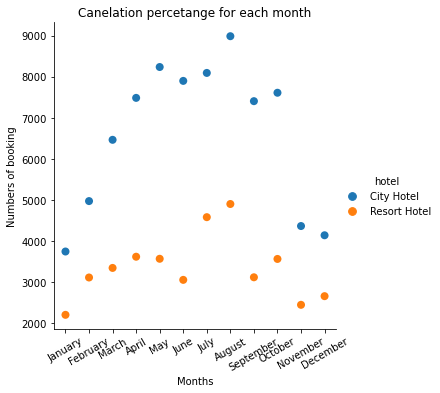

In [16]:
plt.figure(figsize=[10, 8])

months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']


sb.catplot(data= hotel_booking_canceled, x = 'arrival_date_month', y = 'booking', kind = 'swarm', s = 8,hue = 'hotel', order = months)
plt.xticks(rotation = 30)
plt.ylabel('Numbers of booking')
plt.xlabel('Months')
plt.title('Canelation percetange for each month');

### Cancelation Rate vs Number of Booking

#### What is the relation between booking number and cancelation rate ?

Number of bookings and cancelation rate are positively correlated. It indicates that, high booking numbers in hotels, will increase cancelation rate.

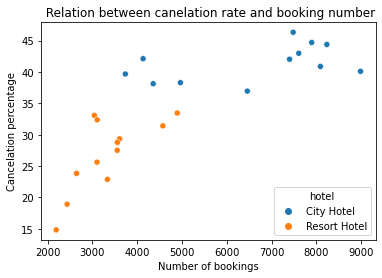

In [17]:
months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']


sb.scatterplot(data= hotel_booking_canceled, x = 'booking', y = 'cancelation_per',hue = 'hotel')

plt.ylabel('Cancelation percentage')
plt.xlabel('Number of bookings')
plt.title(' Relation between canelation rate and booking number');

### Price Per Person vs Number of Guests

####  how number of visitors affects price per person in both hotel types?

According to the graph, changes in number of visitors do not affect price per person in both hotel types.  

In [19]:
# Replacing o values in adr column with mean value of adr
hotel['adr'].replace(0,hotel['adr'].mean(axis=0),inplace=True)

# Finding negative adr value and droping 
neg_adr = hotel[hotel['adr'] < 0.000]

hotel = hotel.drop(index=14969)

hotel["adr"] = hotel['adr'].astype('int')

# here we drop nan values from children column
hotel = hotel.dropna(subset=['children'])

hotel["children"].isnull().sum()

hotel["children"] = hotel['children'].astype('int')

hotel['price_per_person'] = hotel['adr'] / hotel['adults'] + hotel['children']

hotel["price_per_person"] = hotel['price_per_person'].round()

hotel['price_per_person'] = hotel['price_per_person'].fillna(value=hotel['price_per_person'].mean())

#extracting reservations which are not canceled
hotel_not_canceled = hotel[hotel['is_canceled'] == 0]

# Replacing 0 values with mean value of price per person column

hotel_not_canceled['price_per_person'].replace(0,hotel_not_canceled['price_per_person'].mean(axis=0),inplace=True)

/var/folders/10/qztlx7hn6l3g4_w_tpm4z9m80000gn/T/ipykernel_17605/3078325194.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_not_canceled['price_per_person'].replace(0,hotel_not_canceled['price_per_person'].mean(axis=0),inplace=True)


In [20]:
ppp_month = hotel_not_canceled.copy()

ppp_month = ppp_month[['hotel', 'arrival_date_month','price_per_person' ]]

ppp_month

# current dataframe contains inf values
ppp_month.isin([np.inf]).sum()

''' Some of the values' type in ppp_month dataframe is inf type which is not allow us to plot results appropriately. 
    Therefore these values will be replaced with nan values and be drooped  '''

ppp_month.replace([np.inf, -np.inf], np.nan, inplace=True)

ppp_month.dropna(inplace=True)

ppp_month = ppp_month.groupby(['hotel', 'arrival_date_month']).mean()['price_per_person'].reset_index()

In [21]:
guest_numbers= hotel_not_canceled.groupby(['hotel','arrival_date_month']).sum()['adults'].reset_index()
visitor_price = guest_numbers
visitor_price['price_per_person'] = ppp_month['price_per_person']
visitor_price.head()

,hotel,arrival_date_month,adults,price_per_person
0,City Hotel,April,7665,62.593445
1,City Hotel,August,10528,64.266741
2,City Hotel,December,4393,53.277307
3,City Hotel,February,5369,54.698157
4,City Hotel,January,3779,54.957028


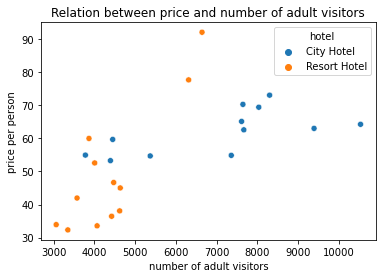

In [22]:
sb.scatterplot( data = visitor_price, x = 'adults', y = 'price_per_person', hue = 'hotel');
plt.ylabel('price per person')
plt.xlabel('number of adult visitors')
plt.title('Relation between price and number of adult visitors');

### Price Per Person vs Cancelaton rate

#### How price per person affects the cancelation rate ?

Unlike the previous graph, here we can see that, relation between cancelation rate and price per person is positive. as the price increases, visitors are more likely tend to cancel the reservation.

In [23]:
cancelation_price = hotel_booking_canceled.loc[:, ['hotel', 'arrival_date_month', 'cancelation_per']]
cancelation_price['price_per_person'] = visitor_price['price_per_person']
cancelation_price.head()

,hotel,arrival_date_month,cancelation_per,price_per_person
0,City Hotel,April,46.323529,62.593445
1,City Hotel,August,40.097963,64.266741
2,City Hotel,December,42.110358,53.277307
3,City Hotel,February,38.288016,54.698157
4,City Hotel,January,39.668094,54.957028


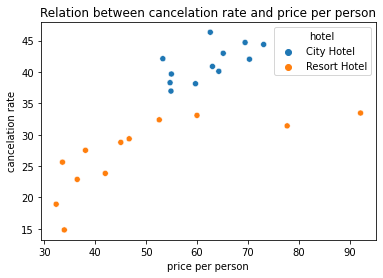

In [24]:
sb.scatterplot( data = cancelation_price, x = 'price_per_person', y = 'cancelation_per', hue = 'hotel')
plt.ylabel('cancelation rate')
plt.xlabel('price per person')
plt.title('Relation between cancelation rate and price per person');

In [ ]:
!jupyter nbconvert Part2_Presentation.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part2_Presentation.ipynb to slides
[NbConvertApp] Writing 705318 bytes to Part2_Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part2_Presentation.slides.html
Use Control-C to stop this server
